# **Netflix Data: Cleaning, Analysis, and Visualization**

In [1]:
# Step 1: Import Required Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# remove warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Step 2: Load the Dataset

data = pd.read_csv('/content/drive/MyDrive/Datasets/netflix_data.csv')
data.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [4]:
print('Rows, Columns:',data.shape)
data.info()

Rows, Columns: (8790, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


In [5]:
# Step 3: Data Cleaning
#Identify and handle missing data, correct data types, and drop duplicates.

# Check for missing values
print(data.isnull().sum())

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64


In [6]:
# Drop duplicates if any
data.drop_duplicates(inplace=True)

# Drop rows with missing critical information
data.dropna(subset=['director', 'country'],inplace=True)

# Convert 'date_added' to datetime
data['date_added'] = pd.to_datetime(data['date_added'])

# Show data types to confirm changes
print(data.dtypes)

show_id                 object
type                    object
title                   object
director                object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
dtype: object


**Step 4: Exploratory Data Analysis (EDA)**

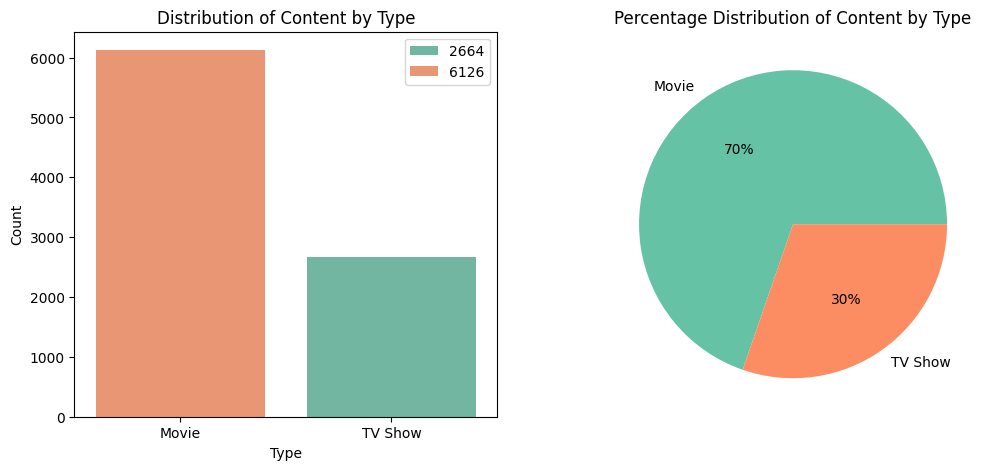

In [ ]:
# 1. Content Type Distribution (Movies vs. TV Shows)

type_counts = data['type'].value_counts()

# Plot the distribution

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.barplot(x=type_counts.index, y=type_counts.values, hue=type_counts.values, palette='Set2')
plt.title('Distribution of Content by Type')
plt.xlabel('Type')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
plt.pie(type_counts, labels=type_counts.index, autopct='%.0f%%', colors=sns.color_palette('Set2'))
plt.title('Percentage Distribution of Content by Type')
plt.show()

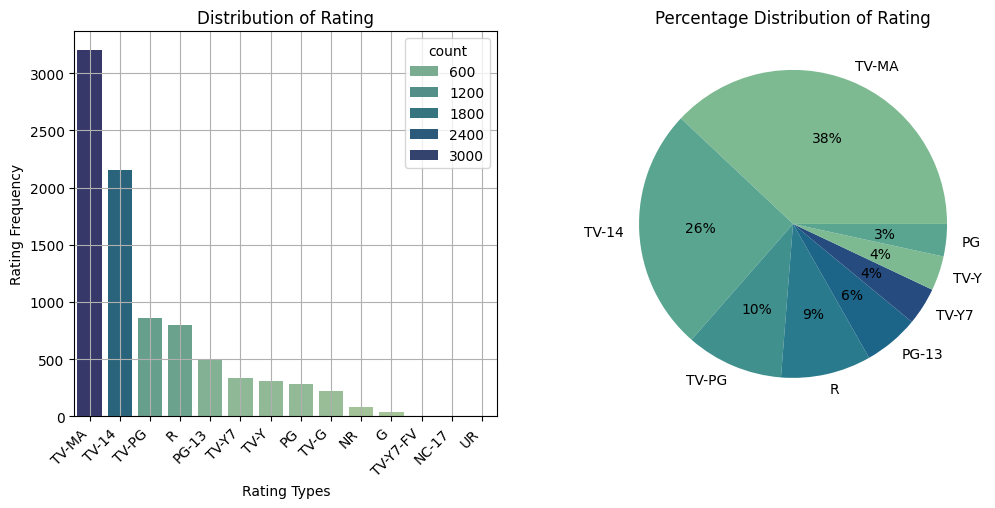

In [ ]:
# Rating Frequency (Movies vs. TV Shows)

ratings = data['rating'].value_counts().reset_index().sort_values(by='count', ascending=False)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.barplot(x='rating', y='count', data=ratings, hue='count', palette='crest')
plt.xticks(rotation=45, ha='right')
plt.xlabel("Rating Types")
plt.ylabel("Rating Frequency")
plt.title('Distribution of Rating')
plt.grid()

plt.subplot(1, 2, 2)
plt.pie(ratings['count'][:8], labels=ratings['rating'][:8], autopct='%.0f%%', colors=sns.color_palette('crest'))
plt.title('Percentage Distribution of Rating')
plt.show()

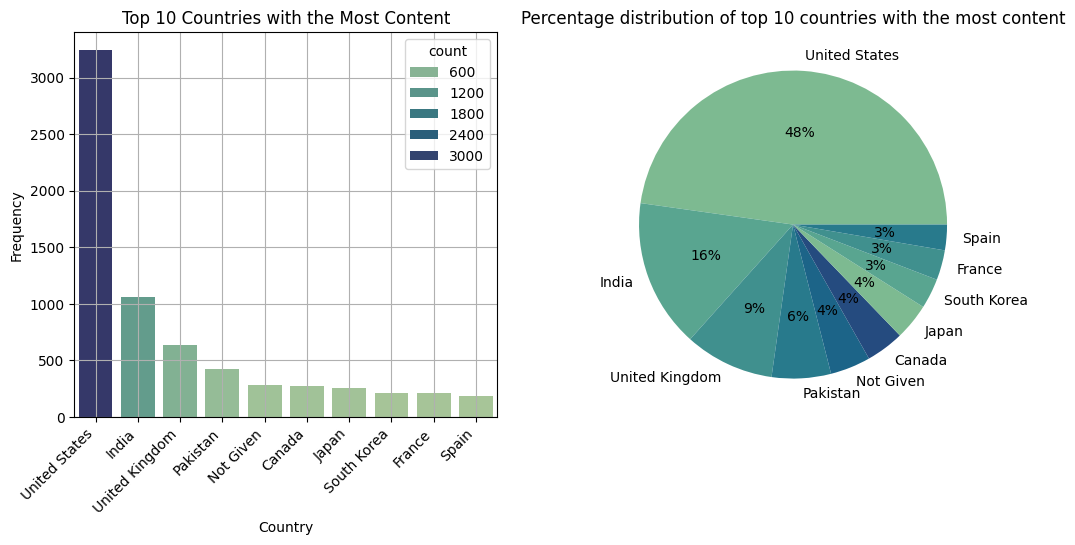

In [ ]:
# Top 10 Countries with Most Content

top_ten_countries = data['country'].value_counts().reset_index().sort_values(by='count', ascending=False)[:10]

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.barplot(x='country', y='count', data=top_ten_countries, hue='count', palette='crest')
plt.xticks(rotation=45, ha='right')
plt.xlabel("Country")
plt.ylabel("Frequency")
plt.title("Top 10 Countries with the Most Content")
plt.grid()

plt.subplot(1, 2, 2)
plt.title("Percentage distribution of top 10 countries with the most content")
plt.pie(top_ten_countries['count'], labels=top_ten_countries['country'], autopct='%.0f%%', colors=sns.color_palette('crest'))
plt.show()

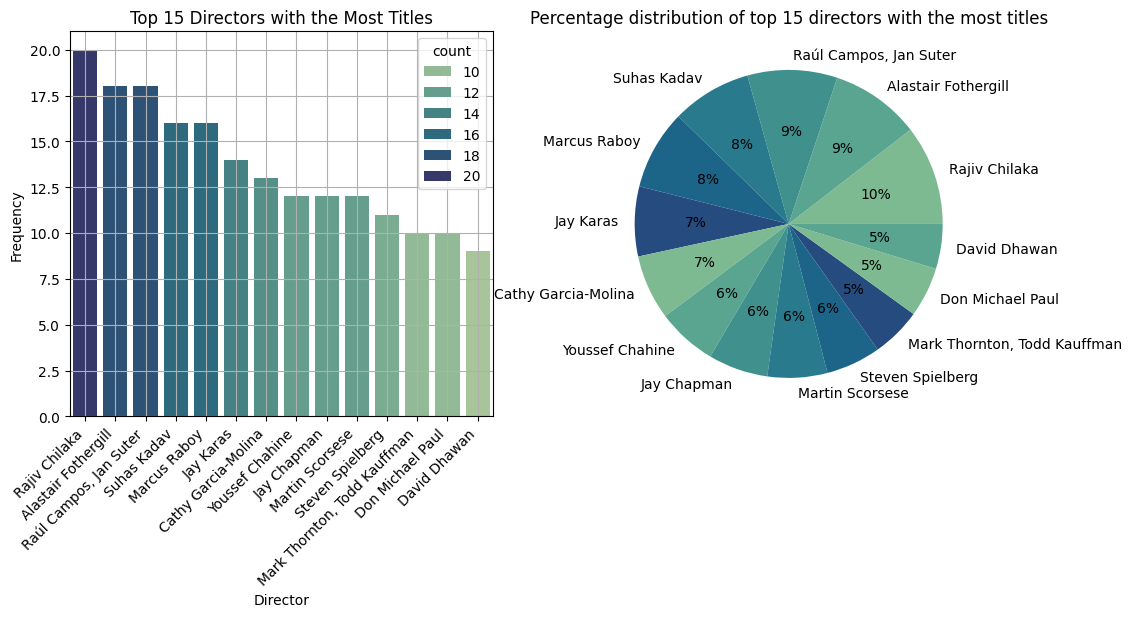

In [ ]:
# Top 15 Directors with the Most Titles

top_directors = data['director'].value_counts().reset_index().sort_values(by='count', ascending=False)[1:15]

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.barplot(x='director', y='count', data=top_directors.head(15), hue='count', palette='crest')
plt.xticks(rotation=45, ha='right')
plt.xlabel("Director")
plt.ylabel("Frequency")
plt.title("Top 15 Directors with the Most Titles")
plt.grid()

plt.subplot(1, 2, 2)
plt.title("Percentage distribution of top 15 directors with the most titles")
plt.pie(top_directors['count'][:15], labels=top_directors['director'][:15], autopct='%.0f%%', colors=sns.color_palette('crest'))
plt.show()

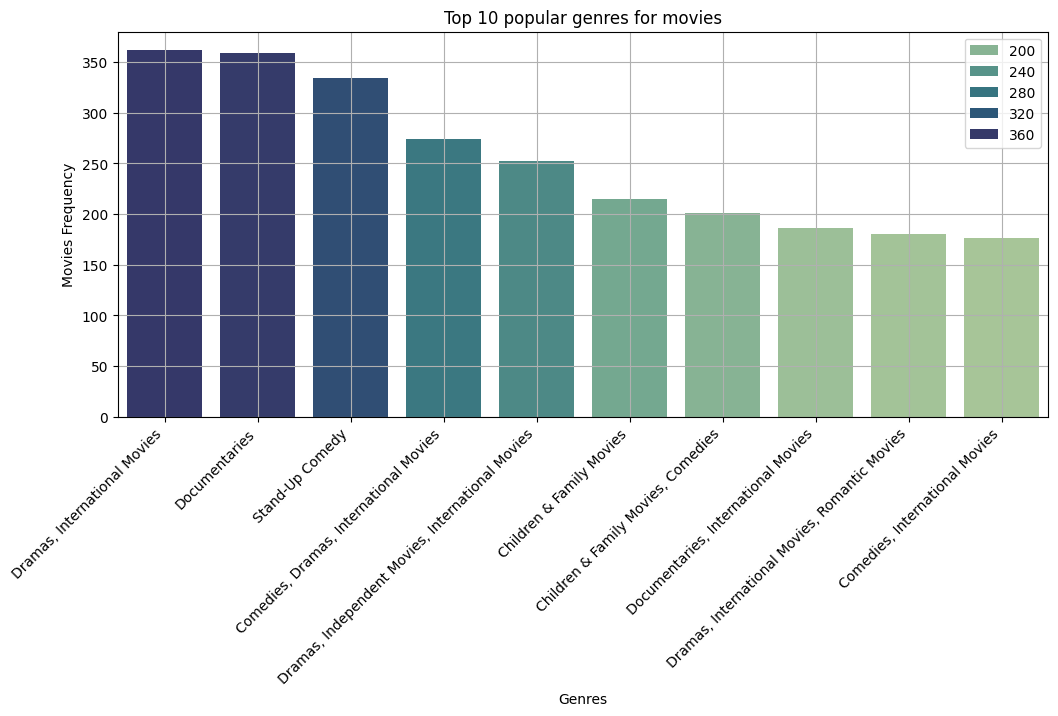

In [ ]:
# Top 10 Popular Movie Genres

popular_movie_genre=data[data['type']=='Movie'].groupby("listed_in").size().sort_values(ascending=False)[:10]

plt.figure(figsize=(12, 5))
sns.barplot(x=popular_movie_genre.index, y=popular_movie_genre.values, hue=popular_movie_genre.values, palette='crest')
plt.title("Top 10 popular genres for movies")
plt.xlabel("Genres")
plt.xticks(rotation=45, ha='right')
plt.ylabel("Movies Frequency")
plt.grid()
plt.show()

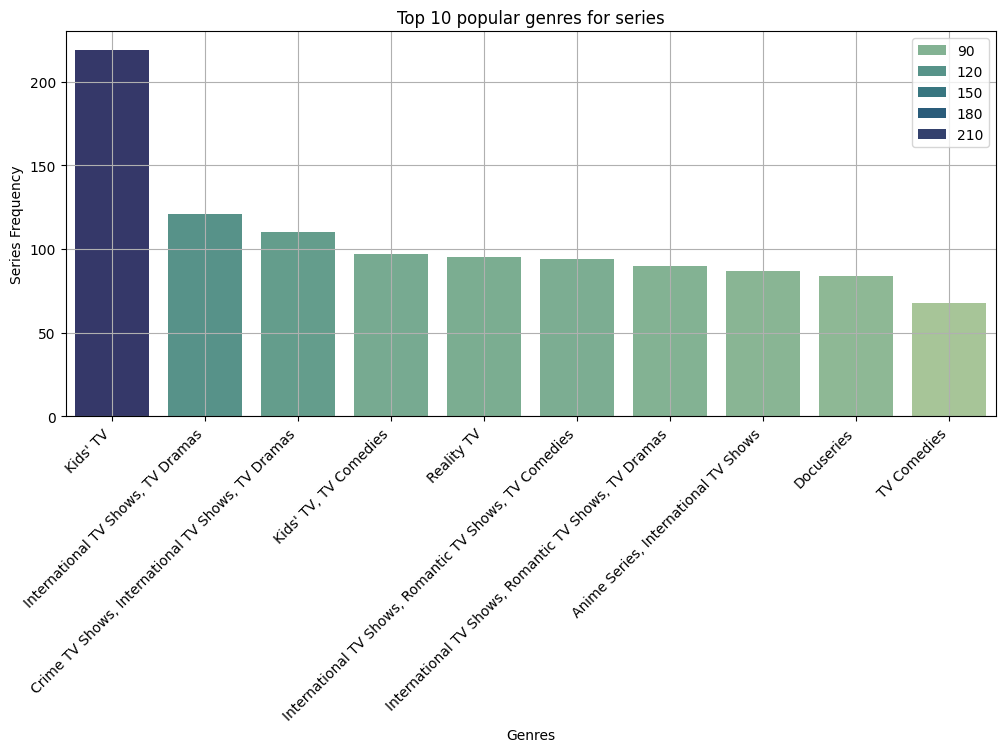

In [ ]:
# Top 10 Popular Series Genres

popular_series_genre=data[data['type']=='TV Show'].groupby("listed_in").size().sort_values(ascending=False)[:10]

plt.figure(figsize=(12, 5))
sns.barplot(x=popular_series_genre.index, y=popular_series_genre.values, hue=popular_series_genre.values, palette='crest')
plt.title("Top 10 popular genres for series")
plt.xlabel("Genres")
plt.xticks(rotation=45, ha='right')
plt.ylabel("Series Frequency")
plt.grid()
plt.show()

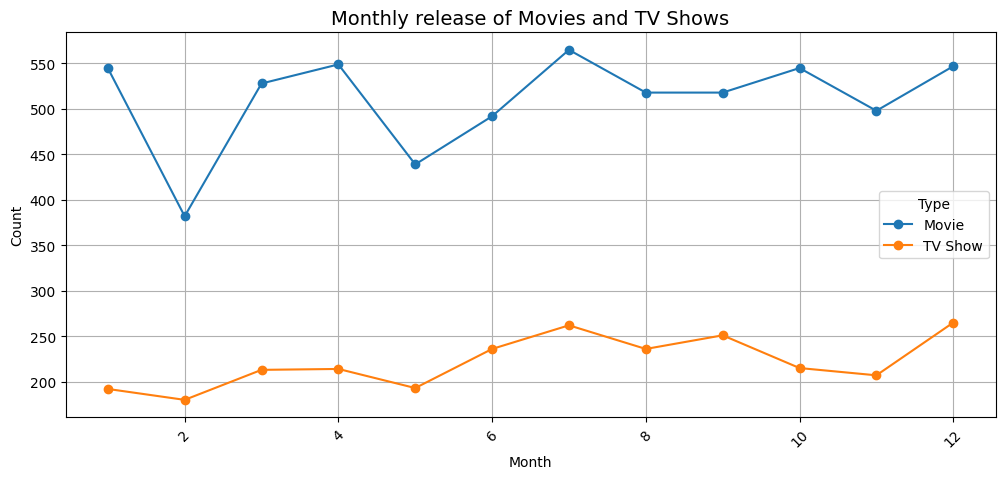

In [ ]:
# Monthly Releases of Movies and TV shows

# Extract month from 'date_added'
data['month_added'] = data['date_added'].dt.month

# Plot content added over the months using a line chart

plt.figure(figsize=(12, 5))
data.groupby(['month_added', 'type']).size().unstack().plot(kind='line', marker='o', ax=plt.gca())
plt.title('Monthly release of Movies and TV Shows', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Type')
plt.grid(True)
plt.show()

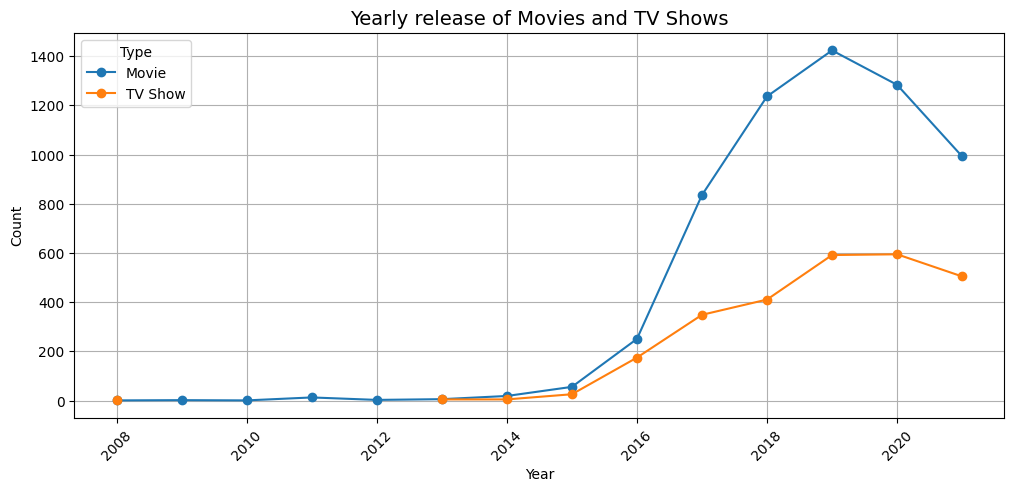

In [ ]:
# Yearly Releases of Movies and TV shows

data['year_added'] = data['date_added'].dt.year

# Plot content added over the years using a line chart
plt.figure(figsize=(12, 5))
data.groupby(['year_added', 'type']).size().unstack().plot(kind='line', marker='o', ax=plt.gca())
plt.title('Yearly release of Movies and TV Shows', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Type')
plt.grid()
plt.show()

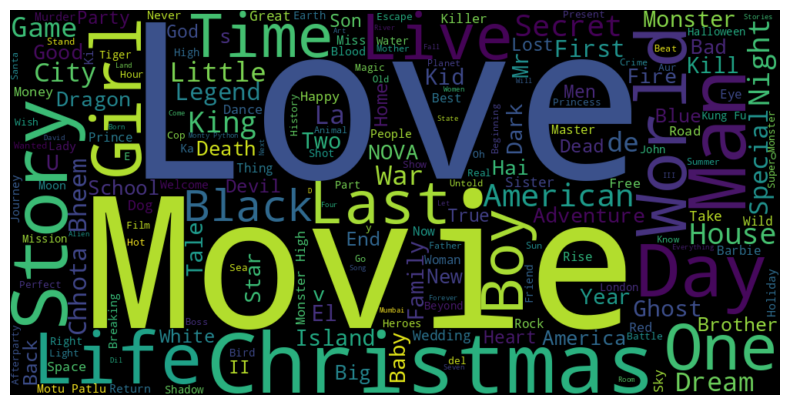

In [ ]:
# Word Cloud of Movie Titles

# Create a word cloud for movie titles
movie_titles = data[data['type'] == 'Movie']['title']
wordcloud = WordCloud(width=1000, height=500, background_color='black').generate(' '.join(movie_titles))

# Display the word cloud
plt.figure(figsize=(12, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()